<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch03_independence.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Independence

Some experimental results **do not affect others**. For example:
- If I flip a coin twice, whether I get heads on the first flip has **no effect** on whether I get heads on the second flip
- I flip a coin—the outcome does not affect whether I get hit on the head by a falling apple later in the day

We refer to events with this property as **independent**.

---

## Non-Independent Events

Here is a pair of events that is **not independent**:

Imagine I throw a six-sided die:
- Write $A$ for the event "die comes up with an odd number of spots"
- Write $B$ for the event "number of spots is either 3 or 5"

These events are interrelated in an important way. If I know that $B$ has occurred, I also know that $A$ has occurred—I don't need to check separately, because **$B$ implies $A$**.

### Weaker Interaction

Here is an example of a weaker interaction that results in events not being independent:

- Write $C$ for the event "die comes up with an odd number of spots"
- Write $D$ for the event "number of spots is larger than 3"

These events are interrelated:
- The probability of each event separately is $\frac{1}{2}$
- If I know that $C$ has occurred, then I know the die shows either 1, 3, or 5 spots
- One of these outcomes belongs to $D$, and two do not
- This means that knowing $C$ has occurred tells you something about whether $D$ has occurred

**Independent events do not have this property.**

---

## Definition 3.3: Independent Events

Two events $A$ and $B$ are **independent** if and only if:

$$P(A \cap B) = P(A)P(B)$$

### The Size Analogy

The size analogy helps motivate this expression. We think of $P(A)$ as the size of $A$ relative to $\Omega$, and so on.

Now $P(A \cap B)$ measures the size of $A \cap B$—that is, the part of $A$ that lies inside $B$.

But if $A$ and $B$ are independent, then:
- The size of $A \cap B$ relative to $B$ should be the **same** as the size of $A$ relative to $\Omega$
- Otherwise, $B$ affects $A$, because $A$ is more or less likely when $B$ has occurred

So for $A$ and $B$ to be independent, we must have:

$$\frac{\text{Size of } A}{\text{Size of } \Omega} = \frac{\text{Size of piece of } A \text{ in } B}{\text{Size of } B}$$

or, equivalently:

$$P(A) = \frac{P(A \cap B)}{P(B)}$$

which yields our expression.

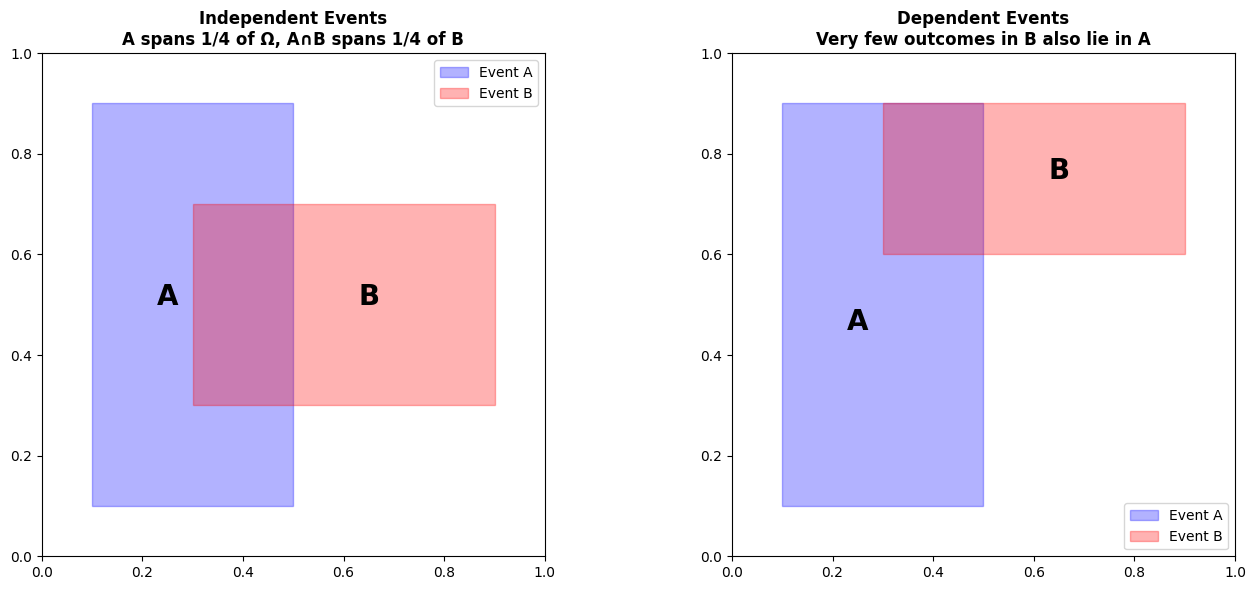

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Visualize independence
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Independent events
ax = axes[0]
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.4, 0.8, 
                                 fill=True, alpha=0.3, color='blue', label='Event A'))
ax.add_patch(patches.Rectangle((0.3, 0.3), 0.6, 0.4, 
                                 fill=True, alpha=0.3, color='red', label='Event B'))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title('Independent Events\nA spans 1/4 of Ω, A∩B spans 1/4 of B', 
             fontsize=12, fontweight='bold')
ax.text(0.25, 0.5, 'A', fontsize=20, ha='center', fontweight='bold')
ax.text(0.65, 0.5, 'B', fontsize=20, ha='center', fontweight='bold')
ax.legend()

# Right: Dependent events
ax = axes[1]
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.4, 0.8, 
                                 fill=True, alpha=0.3, color='blue', label='Event A'))
ax.add_patch(patches.Rectangle((0.3, 0.6), 0.6, 0.3, 
                                 fill=True, alpha=0.3, color='red', label='Event B'))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title('Dependent Events\nVery few outcomes in B also lie in A', 
             fontsize=12, fontweight='bold')
ax.text(0.25, 0.45, 'A', fontsize=20, ha='center', fontweight='bold')
ax.text(0.65, 0.75, 'B', fontsize=20, ha='center', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

---

## Worked Examples: Testing Independence

### Worked Example 3.16: Fair Dice

**Problem**: The space of outcomes for a fair six-sided die is $\{1, 2, 3, 4, 5, 6\}$. The die is fair, so each outcome has the same probability. Now we toss **two fair six-sided dice**. The outcome for each die is independent of that for the other. With what probability do we get **two threes**?

**Solution**:
$$P(\text{first die yields 3 and second die yields 3}) = P(\text{first die yields 3}) \cdot P(\text{second die yields 3})$$
$$= \left(\frac{1}{6}\right) \cdot \left(\frac{1}{6}\right) = \frac{1}{36}$$

In [2]:
# Verify with simulation
np.random.seed(42)
n_trials = 100000
die1 = np.random.randint(1, 7, size=n_trials)
die2 = np.random.randint(1, 7, size=n_trials)

both_threes = np.sum((die1 == 3) & (die2 == 3))
prob = both_threes / n_trials

print(f"Simulated P(two threes) = {prob:.4f}")
print(f"Theoretical = 1/36 = {1/36:.4f}")
print(f"Difference: {abs(prob - 1/36):.4f}")

Simulated P(two threes) = 0.0275
Theoretical = 1/36 = 0.0278
Difference: 0.0003


---

### Worked Example 3.17: Find the Lady, Twice

**Problem**: Recall the setup of Worked example 3.1. Assume that the card that is chosen is chosen fairly—that is, each card is chosen with the same probability. The game is played **twice**, and the cards are **reshuffled between games**. What is the probability of turning up a Queen and then a Queen again?

**Solution**: The events are independent, so:
$$P(\text{Queen twice}) = \frac{1}{3} \cdot \frac{1}{3} = \frac{1}{9}$$

---

### Worked Example 3.18: Cards and Independence

**Problem**: 
1. We shuffle a standard deck of 52 cards and draw one card. Event $A$ is "the card is a red suit" and event $B$ is "the card is a 10". Are $A$ and $B$ independent?

2. Now we take a standard deck of cards, and **remove the ten of hearts**. We shuffle this deck, and draw one card. Event $C$ is "the card drawn from the modified deck is a red suit" and event $D$ is "the card drawn from the modified deck is a 10". Are $C$ and $D$ independent?

**Solution**:

**Part 1**: 
- $P(A) = \frac{1}{2}$
- $P(B) = \frac{4}{52} = \frac{1}{13}$
- $P(A \cap B) = \frac{2}{52} = \frac{1}{26}$ (two red tens)

Check: $P(A)P(B) = \frac{1}{2} \cdot \frac{1}{13} = \frac{1}{26} = P(A \cap B)$ ✓

So they are **independent**.

**Part 2**:
- $P(C) = \frac{25}{51}$ (removed one red card)
- $P(D) = \frac{3}{51}$ (removed one ten)
- $P(C \cap D) = \frac{1}{51}$ (only one red ten left)

Check: $P(C)P(D) = \frac{25}{51} \cdot \frac{3}{51} = \frac{75}{2601} \neq \frac{1}{51}$

So they are **NOT independent**.

In [3]:
# Part 1: Full deck
P_A = 26/52
P_B = 4/52
P_AB = 2/52

print("Part 1 (full deck):")
print(f"  P(A) = {P_A:.4f}")
print(f"  P(B) = {P_B:.4f}")
print(f"  P(A∩B) = {P_AB:.4f}")
print(f"  P(A)×P(B) = {P_A*P_B:.4f}")
print(f"  Independent? {np.isclose(P_AB, P_A*P_B)}")

# Part 2: Removed ten of hearts
P_C = 25/51
P_D = 3/51
P_CD = 1/51

print("\nPart 2 (removed 10♥):")
print(f"  P(C) = {P_C:.4f}")
print(f"  P(D) = {P_D:.4f}")
print(f"  P(C∩D) = {P_CD:.4f}")
print(f"  P(C)×P(D) = {P_C*P_D:.4f}")
print(f"  Independent? {np.isclose(P_CD, P_C*P_D)}")

Part 1 (full deck):
  P(A) = 0.5000
  P(B) = 0.0769
  P(A∩B) = 0.0385
  P(A)×P(B) = 0.0385
  Independent? True

Part 2 (removed 10♥):
  P(C) = 0.4902
  P(D) = 0.0588
  P(C∩D) = 0.0196
  P(C)×P(D) = 0.0288
  Independent? False


---

### Worked Example 3.19: Accidental DNA Matches

**Problem**: I search a DNA database with a sample. Each time I attempt to match this sample to an entry in the database, there is a probability of an **accidental (chance) match** of $1 \times 10^{-4}$. Chance matches are independent. There are **20,000 people** in the database. What is the probability I get **at least one match**, purely by chance?

**Solution**: This is $1 - P(\text{no chance matches})$. But $P(\text{no chance matches})$ is much smaller than you think:

$$P(\text{no chance matches}) = P\left(\begin{array}{c}
\text{no chance match to record 1} \\
\text{AND no chance match to record 2} \\
\text{AND ... AND no chance match to record 20,000}
\end{array}\right)$$

$$= P(\text{no chance match to a record})^{20000}$$
$$= (1 - 10^{-4})^{20000} \approx 0.14$$

So the probability is about **0.86** that you get at least one match by chance!

If the database gets bigger, the probability grows—at 40,000 the probability of one match by chance is **0.98**.

Database size  1,000: P(at least 1 match) = 0.0952
Database size 10,000: P(at least 1 match) = 0.6321
Database size 20,000: P(at least 1 match) = 0.8647
Database size 40,000: P(at least 1 match) = 0.9817
Database size 100,000: P(at least 1 match) = 1.0000


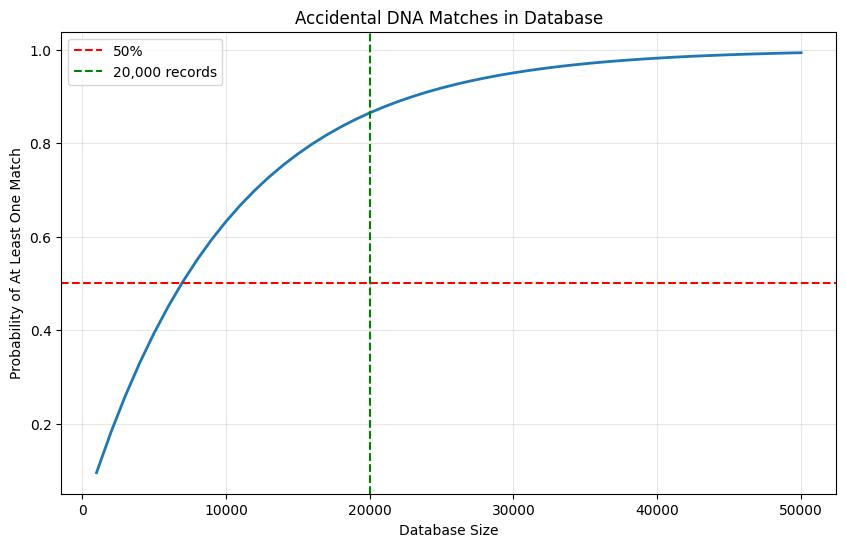

In [4]:
# DNA database false positives
def prob_at_least_one_match(db_size, match_prob=1e-4):
    """Probability of at least one accidental match"""
    prob_no_match = (1 - match_prob) ** db_size
    return 1 - prob_no_match

# Calculate for different database sizes
for size in [1000, 10000, 20000, 40000, 100000]:
    prob = prob_at_least_one_match(size)
    print(f"Database size {size:6,}: P(at least 1 match) = {prob:.4f}")

# Visualize
db_sizes = np.arange(1000, 50001, 1000)
probs = [prob_at_least_one_match(size) for size in db_sizes]

plt.figure(figsize=(10, 6))
plt.plot(db_sizes, probs, linewidth=2)
plt.axhline(y=0.5, color='red', linestyle='--', label='50%')
plt.axvline(x=20000, color='green', linestyle='--', label='20,000 records')
plt.xlabel('Database Size')
plt.ylabel('Probability of At Least One Match')
plt.title('Accidental DNA Matches in Database')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Key Insight**: If you're surprised, look at the exponent. The probability of a set of independent events can become very small very quickly!

---

## The Gambler's Fallacy

People quite often reason poorly about independent events. The most common problem is known as the **gambler's fallacy**.

This occurs when you reason that the probability of an independent event has been changed by previous outcomes.

**Example**: Imagine I toss a coin that is known to be fair 20 times and get 20 heads. The probability that the next toss will result in a head has **not changed at all**—it is still 0.5—but many people will believe that it has changed.

At time of writing, Wikipedia has some fascinating stories about the gambler's fallacy which suggest that it's quite a common mistake.

People may interpret, say, a run of 20 heads as evidence that either:
1. The coin isn't fair, or
2. The tosses aren't independent

```{admonition} Remember This
:class: warning
Independence can mislead your intuition. There are two common problems:

1. The probability of a set of independent events can become very small very quickly, so that modelling events that aren't independent as independent can lead to trouble (as in Worked example 3.19)

2. Most people want to believe that the universe keeps track of independent events to ensure that probability calculations work (the gambler's fallacy)


---

## 3.3.1 Example: Airline Overbooking

We can now quite easily study **airline overbooking**. Airlines generally sell **more tickets** for a flight than there are seats on the aircraft, because:
- Some passengers don't turn up on time, usually for random reasons
- If the airline only sold one ticket per seat, their planes would likely have empty seats—which are **lost profit**—on each flight
- If too many passengers turn up for a flight, the airline hopes that someone will accept a reasonable sum of money to take the next flight

Overbooking is **sensible, efficient behavior** and good for passengers if sensibly administered by the airline. This is because:
- Ticket prices should be at their lowest when each plane is just full
- There is quite likely some passenger who will take money to fly at some other time

To choose the number of extra tickets sold, the airline needs to think about:
- The probability of having to pay out (which we compute below)
- The amount of money they will need to pay

---

### Worked Example 3.20: Overbooking1

**Problem**: An airline has a regular flight with **six seats**. It always sells **seven tickets**. Passengers turn up for the flight with probability $p$, and do so independent of other passengers. What is the probability that the flight is overbooked?

**Solution**: This is like a coin-flip problem—think of each passenger as a biased coin:
- With probability $p$, the biased coin comes up T (for "turn up")
- With probability $(1-p)$, it comes up H (for "no-show")

This coin is flipped seven times, and we are interested in the probability that there are **seven Ts**. This is $p^7$, because the flips are independent.

In [5]:
# Overbooking 1: 7 tickets, 6 seats
def prob_overbooked_1(p):
    """Probability all 7 passengers show up"""
    return p**7

# Test for different show-up probabilities
for p in [0.7, 0.8, 0.9, 0.95]:
    prob = prob_overbooked_1(p)
    print(f"p={p:.2f}: P(overbooked) = {prob:.6f} = {prob:.4%}")

p=0.70: P(overbooked) = 0.082354 = 8.2354%
p=0.80: P(overbooked) = 0.209715 = 20.9715%
p=0.90: P(overbooked) = 0.478297 = 47.8297%
p=0.95: P(overbooked) = 0.698337 = 69.8337%



---

### Worked Example 3.21: Overbooking2

**Problem**: An airline has a regular flight with **six seats**. It always sells **eight tickets**. Passengers turn up for the flight with probability $p$, and do so independent of other passengers. What is the probability that the flight is overbooked?

**Solution**: Now we flip the coin eight times, and are interested in the probability of getting **more than six Ts**. This is the union of two disjoint events: **seven Ts** and **eight Ts**.

- For the case of **seven Ts**, one flip must be H—there are 8 choices for this flip
- For the case of **eight Ts**, all eight flips must be T, and there is only one way to achieve this

So the probability the flight is overbooked is:

$$P(\text{overbooked}) = P(\text{7 Ts OR 8 Ts})$$
$$= P(\text{7 Ts}) + P(\text{8 Ts})$$
$$= 8p^7(1-p) + p^8$$

In [6]:
# Overbooking 2: 8 tickets, 6 seats
def prob_overbooked_2(p):
    """Probability 7 or 8 passengers show up"""
    return 8 * p**7 * (1-p) + p**8

for p in [0.7, 0.8, 0.9, 0.95]:
    prob = prob_overbooked_2(p)
    print(f"p={p:.2f}: P(overbooked) = {prob:.6f} = {prob:.4%}")

p=0.70: P(overbooked) = 0.255298 = 25.5298%
p=0.80: P(overbooked) = 0.503316 = 50.3316%
p=0.90: P(overbooked) = 0.813105 = 81.3105%
p=0.95: P(overbooked) = 0.942755 = 94.2755%



---

### Worked Example 3.22: Overbooking3

**Problem**: An airline has a regular flight with **six seats**. It always sells **eight tickets**. Passengers turn up for the flight with probability $p$, and do so independent of other passengers. What is the probability that **six passengers arrive**? (i.e., the flight is not overbooked or underbooked)

**Solution**: Now we flip the coin eight times, and are interested in the probability of getting **exactly six Ts**.

The probability that a particular set of six passengers arrives is given by the probability of getting any given string of six Ts and two Hs. This must have probability $p^6(1-p)^2$.

But there are a total of $\binom{8}{6} = 28$ distinct such strings. So the probability that six passengers arrive is:

$$P(\text{6 passengers}) = \binom{8}{6}p^6(1-p)^2 = 28p^6(1-p)^2$$

In [7]:
from scipy.special import comb

# Overbooking 3: exactly 6 passengers
def prob_exactly_6(p):
    """Probability exactly 6 passengers show up"""
    return comb(8, 6, exact=True) * p**6 * (1-p)**2

for p in [0.7, 0.8, 0.9, 0.95]:
    prob = prob_exactly_6(p)
    print(f"p={p:.2f}: P(exactly 6) = {prob:.6f} = {prob:.4%}")

p=0.70: P(exactly 6) = 0.296475 = 29.6475%
p=0.80: P(exactly 6) = 0.293601 = 29.3601%
p=0.90: P(exactly 6) = 0.148803 = 14.8803%
p=0.95: P(exactly 6) = 0.051456 = 5.1456%



---

### Worked Example 3.23: Overbooking4 (General Formula)

**Problem**: An airline has a regular flight with $s$ seats. It always sells $t$ tickets. Passengers turn up for the flight with probability $p$, and do so independent of other passengers. What is the probability that $u$ passengers turn up?

**Solution**: Now we flip the coin $t$ times, and are interested in the probability of getting $u$ Ts.

There are $\binom{t}{u}$ disjoint outcomes with $u$ Ts and $t-u$ Hs. Each such outcome is independent, and has probability $p^u(1-p)^{t-u}$.

So:

$$P(\text{$u$ passengers turn up}) = \binom{t}{u}p^u(1-p)^{t-u}$$

---

### Worked Example 3.24: Overbooking5 (Oversold)

**Problem**: An airline has a regular flight with $s$ seats. It always sells $t$ tickets. Passengers turn up for the flight with probability $p$, and do so independent of other passengers. What is the probability that the flight is oversold?

**Solution**: We need:

$$P(\{s+1 \text{ turn up}\} \cup \{s+2 \text{ turn up}\} \cup \cdots \cup \{t \text{ turn up}\})$$

But the events $\{i \text{ turn up}\}$ and $\{j \text{ turn up}\}$ are disjoint if $i \neq j$. So we can exploit Example 3.23, and write:

$$P(\text{overbooked}) = \sum_{i=s+1}^{t} P(\{i \text{ turn up}\})$$
$$= \sum_{i=s+1}^{t} \binom{t}{i}p^i(1-p)^{t-i}$$

In [8]:
# General overbooking function
def prob_overbooked_general(s, t, p):
    """
    Probability flight is overbooked
    s: number of seats
    t: number of tickets sold
    p: probability passenger shows up
    """
    prob = 0
    for i in range(s+1, t+1):
        prob += comb(t, i, exact=True) * p**i * (1-p)**(t-i)
    return prob

# Test with different scenarios
print("6 seats, varying tickets sold:")
for t in [7, 8, 9, 10]:
    prob = prob_overbooked_general(6, t, 0.9)
    print(f"  {t} tickets: P(overbooked) = {prob:.4f}")

print("\n6 seats, 8 tickets, varying show-up probability:")
for p in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    prob = prob_overbooked_general(6, 8, p)
    print(f"  p={p:.2f}: P(overbooked) = {prob:.4f}")

6 seats, varying tickets sold:
  7 tickets: P(overbooked) = 0.4783
  8 tickets: P(overbooked) = 0.8131
  9 tickets: P(overbooked) = 0.9470
  10 tickets: P(overbooked) = 0.9872

6 seats, 8 tickets, varying show-up probability:
  p=0.70: P(overbooked) = 0.2553
  p=0.75: P(overbooked) = 0.3671
  p=0.80: P(overbooked) = 0.5033
  p=0.85: P(overbooked) = 0.6572
  p=0.90: P(overbooked) = 0.8131
  p=0.95: P(overbooked) = 0.9428


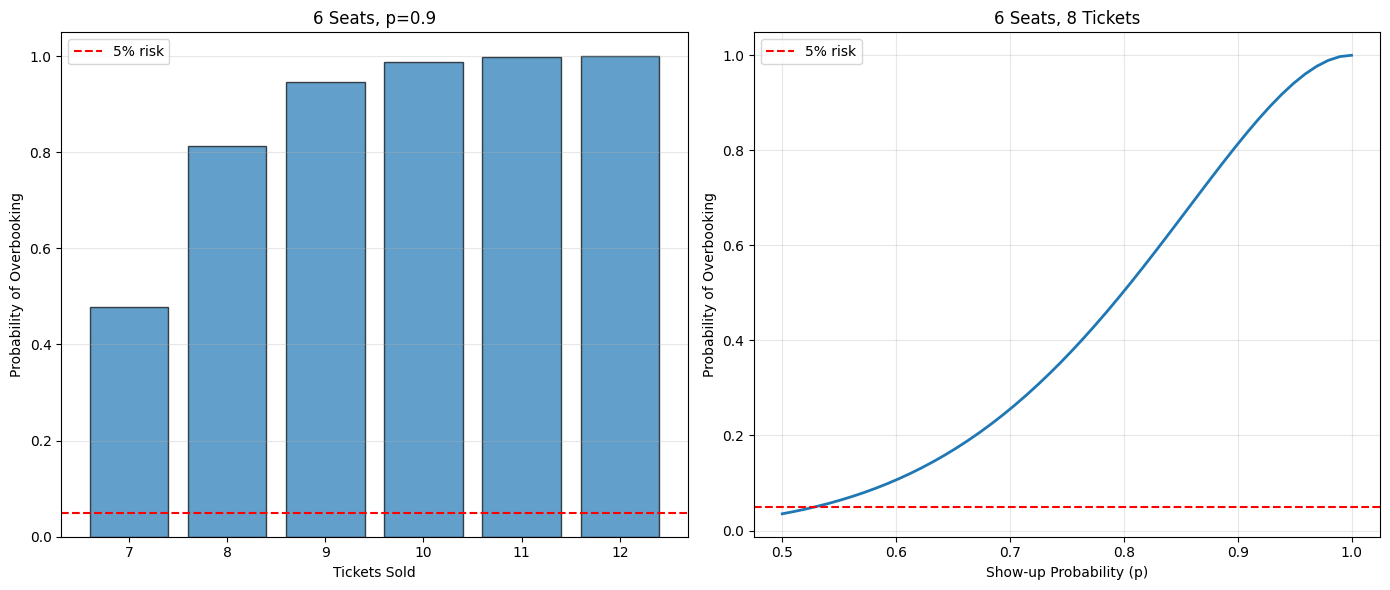

In [9]:
# Visualize overbooking probabilities
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: varying tickets sold
ax = axes[0]
tickets_range = range(7, 13)
probs = [prob_overbooked_general(6, t, 0.9) for t in tickets_range]
ax.bar(tickets_range, probs, edgecolor='black', alpha=0.7)
ax.axhline(y=0.05, color='red', linestyle='--', label='5% risk')
ax.set_xlabel('Tickets Sold')
ax.set_ylabel('Probability of Overbooking')
ax.set_title('6 Seats, p=0.9')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Right: varying show-up probability
ax = axes[1]
p_range = np.linspace(0.5, 1.0, 50)
probs = [prob_overbooked_general(6, 8, p) for p in p_range]
ax.plot(p_range, probs, linewidth=2)
ax.axhline(y=0.05, color='red', linestyle='--', label='5% risk')
ax.set_xlabel('Show-up Probability (p)')
ax.set_ylabel('Probability of Overbooking')
ax.set_title('6 Seats, 8 Tickets')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



---

## Summary

### Key Concepts

1. **Independence**: $P(A \cap B) = P(A)P(B)$
2. **Multiplication rule**: For independent events, multiply probabilities
3. **Common mistake**: Gambler's fallacy
4. **DNA databases**: Probability of false matches grows quickly
5. **Airline overbooking**: Binomial probability application

### Important Formulas

| Concept | Formula |
|---------|--------|
| Independence | $P(A \cap B) = P(A)P(B)$ |
| Multiple independent events | $P(A_1 \cap \cdots \cap A_n) = P(A_1) \cdots P(A_n)$ |
| Binomial probability | $P(k \text{ successes in } n \text{ trials}) = \binom{n}{k}p^k(1-p)^{n-k}$ |

### When to Use Independence

✓ **Use when**:
- Coin flips, dice rolls (different rolls)
- Sampling with replacement
- Truly random processes

✗ **Don't use when**:
- Drawing without replacement
- Correlated events
- Sequential dependencies

---

## Practice Problems

1. **Two dice**: Are "first die is even" and "second die is odd" independent?

2. **Cards**: Draw 2 cards with replacement. Are "first is Ace" and "second is King" independent?

3. **Overbooking**: Airline has 100 seats, sells 105 tickets, $p=0.95$. Find $P(\text{overbooked})$.

4. **DNA database**: 50,000 records, match probability $10^{-5}$. Find $P(\text{at least one false positive})$.

5. **System reliability**: 5 independent components, each with reliability 0.98. Find system reliability if:
   - All must work (series)
   - At least one must work (parallel)

---

→ Next: [3.4 Conditional Probability](ch03_conditional.md)

→ Return to [Chapter 3 Overview](chapter03.md)

---

**Key Takeaway**: Independence means $P(A \cap B) = P(A)P(B)$. Be careful—probabilities of independent events can shrink or grow very quickly when compounded!